In [7]:
import sys
sys.path.append('../')
import numpy as np
import importlib
import utils as u
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, TimeDistributed, Activation, Dropout
from tensorflow.keras.regularizers import L1L2
import tensorflow.keras.backend as K
importlib.reload(u)

<module 'utils' from '..\\utils.py'>

In [8]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:
        print(e)

In [9]:
datadict = u.load_covid_timeseries(smoothing=3, cases_cutoff=0)
cases = datadict['cases_calibrated']
deaths = datadict['deaths_calibrated']

reloading...
cases: 0
cases: 1
cases: 2
cases: 3
cases: 4
cases: 5
cases: 6
cases: 7
cases: 8
cases: 9
cases: 10
cases: 11
cases: 12
cases: 13
cases: 14
cases: 15
cases: 16
cases: 17
cases: 18
cases: 19
cases: 20
cases: 21
cases: 22
cases: 23
cases: 24
cases: 25
cases: 26
cases: 27
cases: 28
cases: 29
cases: 30
cases: 31
cases: 32
cases: 33
cases: 34
cases: 35
cases: 36
cases: 37
cases: 38
cases: 39
cases: 40
cases: 41
cases: 42
cases: 43
cases: 44
cases: 45
cases: 46
cases: 47
cases: 48
cases: 49
cases: 50
cases: 51
cases: 52
cases: 53
cases: 54
cases: 55
cases: 56
cases: 57
cases: 58
cases: 59
cases: 60
cases: 61
cases: 62
cases: 63
cases: 64
cases: 65
cases: 66
cases: 69
cases: 70
cases: 74
cases: 77
cases: 78
cases: 79
cases: 80
cases: 82
cases: 83
cases: 86
cases: 87
cases: 88
cases: 90
cases: 95
cases: 96
cases: 97
cases: 98
cases: 99
cases: 100
cases: 101
cases: 102
cases: 103
cases: 104
cases: 105
cases: 106
cases: 107
cases: 108
cases: 109
cases: 110
cases: 111
cases: 112
case

cases: 818
cases: 819
cases: 820
cases: 821
cases: 823
cases: 825
cases: 826
cases: 827
cases: 828
cases: 829
cases: 830
cases: 831
cases: 832
cases: 833
cases: 834
cases: 836
cases: 837
cases: 838
cases: 839
cases: 840
cases: 841
cases: 842
cases: 843
cases: 844
cases: 845
cases: 846
cases: 848
cases: 849
cases: 850
cases: 851
cases: 852
cases: 853
cases: 854
cases: 855
cases: 857
cases: 858
cases: 859
cases: 860
cases: 861
cases: 863
cases: 864
cases: 865
cases: 866
cases: 867
cases: 870
cases: 871
cases: 872
cases: 873
cases: 874
cases: 875
cases: 876
cases: 877
cases: 878
cases: 879
cases: 880
cases: 882
cases: 883
cases: 884
cases: 885
cases: 886
cases: 887
cases: 889
cases: 890
cases: 891
cases: 892
cases: 893
cases: 895
cases: 896
cases: 897
cases: 898
cases: 900
cases: 901
cases: 902
cases: 903
cases: 905
cases: 906
cases: 908
cases: 909
cases: 910
cases: 911
cases: 913
cases: 915
cases: 916
cases: 917
cases: 918
cases: 919
cases: 921
cases: 922
cases: 924
cases: 925
cases: 927

cases: 1596
cases: 1597
cases: 1598
cases: 1599
cases: 1601
cases: 1602
cases: 1604
cases: 1609
cases: 1612
cases: 1613
cases: 1615
cases: 1616
cases: 1618
cases: 1619
cases: 1621
cases: 1622
cases: 1623
cases: 1624
cases: 1626
cases: 1627
cases: 1629
cases: 1630
cases: 1631
cases: 1634
cases: 1638
cases: 1639
cases: 1640
cases: 1644
cases: 1645
cases: 1648
cases: 1651
cases: 1653
cases: 1654
cases: 1655
cases: 1656
cases: 1660
cases: 1663
cases: 1664
cases: 1665
cases: 1666
cases: 1667
cases: 1669
cases: 1670
cases: 1671
cases: 1672
cases: 1673
cases: 1674
cases: 1675
cases: 1676
cases: 1677
cases: 1679
cases: 1680
cases: 1681
cases: 1683
cases: 1684
cases: 1686
cases: 1687
cases: 1690
cases: 1692
cases: 1693
cases: 1694
cases: 1700
cases: 1701
cases: 1702
cases: 1703
cases: 1706
cases: 1707
cases: 1708
cases: 1709
cases: 1710
cases: 1711
cases: 1713
cases: 1714
cases: 1715
cases: 1716
cases: 1717
cases: 1719
cases: 1722
cases: 1723
cases: 1724
cases: 1725
cases: 1726
cases: 1729
case

cases: 2393
cases: 2394
cases: 2395
cases: 2397
cases: 2399
cases: 2400
cases: 2401
cases: 2402
cases: 2403
cases: 2404
cases: 2405
cases: 2406
cases: 2407
cases: 2409
cases: 2410
cases: 2411
cases: 2412
cases: 2413
cases: 2416
cases: 2417
cases: 2418
cases: 2419
cases: 2420
cases: 2421
cases: 2423
cases: 2424
cases: 2425
cases: 2426
cases: 2428
cases: 2429
cases: 2430
cases: 2431
cases: 2432
cases: 2433
cases: 2434
cases: 2435
cases: 2436
cases: 2437
cases: 2438
cases: 2439
cases: 2440
cases: 2441
cases: 2442
cases: 2443
cases: 2444
cases: 2445
cases: 2446
cases: 2447
cases: 2448
cases: 2449
cases: 2450
cases: 2451
cases: 2452
cases: 2453
cases: 2454
cases: 2455
cases: 2456
cases: 2457
cases: 2458
cases: 2459
cases: 2460
cases: 2462
cases: 2463
cases: 2464
cases: 2465
cases: 2466
cases: 2467
cases: 2468
cases: 2469
cases: 2470
cases: 2471
cases: 2472
cases: 2473
cases: 2474
cases: 2475
cases: 2476
cases: 2477
cases: 2478
cases: 2479
cases: 2480
cases: 2481
cases: 2482
cases: 2483
case

deaths: 30
deaths: 31
deaths: 32
deaths: 33
deaths: 34
deaths: 35
deaths: 36
deaths: 37
deaths: 38
deaths: 39
deaths: 40
deaths: 41
deaths: 42
deaths: 43
deaths: 44
deaths: 45
deaths: 46
deaths: 47
deaths: 48
deaths: 49
deaths: 50
deaths: 51
deaths: 52
deaths: 53
deaths: 54
deaths: 55
deaths: 56
deaths: 57
deaths: 58
deaths: 59
deaths: 60
deaths: 61
deaths: 62
deaths: 63
deaths: 64
deaths: 65
deaths: 66
deaths: 69
deaths: 70
deaths: 74
deaths: 77
deaths: 78
deaths: 79
deaths: 80
deaths: 82
deaths: 83
deaths: 86
deaths: 87
deaths: 88
deaths: 90
deaths: 95
deaths: 96
deaths: 97
deaths: 98
deaths: 99
deaths: 100
deaths: 101
deaths: 102
deaths: 103
deaths: 104
deaths: 105
deaths: 106
deaths: 107
deaths: 108
deaths: 109
deaths: 110
deaths: 111
deaths: 112
deaths: 113
deaths: 114
deaths: 115
deaths: 116
deaths: 118
deaths: 119
deaths: 120
deaths: 121
deaths: 122
deaths: 123
deaths: 124
deaths: 125
deaths: 126
deaths: 127
deaths: 128
deaths: 129
deaths: 130
deaths: 131
deaths: 132
deaths: 133

deaths: 767
deaths: 768
deaths: 769
deaths: 770
deaths: 771
deaths: 772
deaths: 773
deaths: 774
deaths: 775
deaths: 776
deaths: 777
deaths: 778
deaths: 779
deaths: 780
deaths: 781
deaths: 782
deaths: 783
deaths: 784
deaths: 785
deaths: 786
deaths: 787
deaths: 788
deaths: 789
deaths: 791
deaths: 792
deaths: 793
deaths: 794
deaths: 795
deaths: 796
deaths: 797
deaths: 798
deaths: 799
deaths: 800
deaths: 802
deaths: 803
deaths: 804
deaths: 805
deaths: 806
deaths: 807
deaths: 808
deaths: 809
deaths: 810
deaths: 811
deaths: 812
deaths: 813
deaths: 816
deaths: 817
deaths: 818
deaths: 819
deaths: 820
deaths: 821
deaths: 823
deaths: 825
deaths: 826
deaths: 827
deaths: 828
deaths: 829
deaths: 830
deaths: 831
deaths: 832
deaths: 833
deaths: 834
deaths: 836
deaths: 837
deaths: 838
deaths: 839
deaths: 840
deaths: 841
deaths: 842
deaths: 843
deaths: 844
deaths: 845
deaths: 846
deaths: 848
deaths: 849
deaths: 850
deaths: 851
deaths: 852
deaths: 853
deaths: 854
deaths: 855
deaths: 857
deaths: 858
deat

deaths: 1480
deaths: 1481
deaths: 1482
deaths: 1483
deaths: 1484
deaths: 1485
deaths: 1486
deaths: 1487
deaths: 1489
deaths: 1490
deaths: 1491
deaths: 1492
deaths: 1493
deaths: 1494
deaths: 1495
deaths: 1496
deaths: 1497
deaths: 1498
deaths: 1499
deaths: 1500
deaths: 1501
deaths: 1502
deaths: 1503
deaths: 1504
deaths: 1505
deaths: 1506
deaths: 1507
deaths: 1508
deaths: 1509
deaths: 1510
deaths: 1512
deaths: 1513
deaths: 1514
deaths: 1517
deaths: 1518
deaths: 1519
deaths: 1520
deaths: 1521
deaths: 1523
deaths: 1524
deaths: 1526
deaths: 1527
deaths: 1528
deaths: 1529
deaths: 1530
deaths: 1531
deaths: 1532
deaths: 1533
deaths: 1536
deaths: 1538
deaths: 1539
deaths: 1540
deaths: 1541
deaths: 1542
deaths: 1543
deaths: 1544
deaths: 1545
deaths: 1546
deaths: 1548
deaths: 1549
deaths: 1550
deaths: 1552
deaths: 1553
deaths: 1554
deaths: 1555
deaths: 1556
deaths: 1557
deaths: 1558
deaths: 1560
deaths: 1561
deaths: 1562
deaths: 1563
deaths: 1564
deaths: 1565
deaths: 1566
deaths: 1567
deaths: 1569

deaths: 2236
deaths: 2237
deaths: 2238
deaths: 2239
deaths: 2240
deaths: 2241
deaths: 2243
deaths: 2244
deaths: 2245
deaths: 2246
deaths: 2247
deaths: 2248
deaths: 2249
deaths: 2250
deaths: 2251
deaths: 2252
deaths: 2253
deaths: 2254
deaths: 2255
deaths: 2256
deaths: 2257
deaths: 2258
deaths: 2259
deaths: 2260
deaths: 2261
deaths: 2262
deaths: 2263
deaths: 2264
deaths: 2265
deaths: 2266
deaths: 2267
deaths: 2268
deaths: 2269
deaths: 2270
deaths: 2271
deaths: 2272
deaths: 2273
deaths: 2274
deaths: 2275
deaths: 2276
deaths: 2277
deaths: 2278
deaths: 2279
deaths: 2280
deaths: 2281
deaths: 2282
deaths: 2283
deaths: 2284
deaths: 2285
deaths: 2286
deaths: 2287
deaths: 2288
deaths: 2289
deaths: 2290
deaths: 2291
deaths: 2292
deaths: 2293
deaths: 2294
deaths: 2295
deaths: 2296
deaths: 2297
deaths: 2298
deaths: 2299
deaths: 2300
deaths: 2301
deaths: 2302
deaths: 2303
deaths: 2304
deaths: 2305
deaths: 2306
deaths: 2307
deaths: 2308
deaths: 2309
deaths: 2310
deaths: 2311
deaths: 2312
deaths: 2313

deaths: 2946
deaths: 2947
deaths: 2948
deaths: 2949
deaths: 2950
deaths: 2951
deaths: 2952
deaths: 2953
deaths: 2954
deaths: 2955
deaths: 2956
deaths: 2957
deaths: 2958
deaths: 2959
deaths: 2960
deaths: 2961
deaths: 2962
deaths: 2963
deaths: 2965
deaths: 2966
deaths: 2967
deaths: 2968
deaths: 2969
deaths: 2970
deaths: 2971
deaths: 2972
deaths: 2973
deaths: 2974
deaths: 2975
deaths: 2976
deaths: 2977
deaths: 2978
deaths: 2979
deaths: 2980
deaths: 2981
deaths: 2982
deaths: 2983
deaths: 2984
deaths: 2985
deaths: 2986
deaths: 2987
deaths: 2988
deaths: 2989
deaths: 2990
deaths: 2991
deaths: 2992
deaths: 2993
deaths: 2994
deaths: 2995
deaths: 2996
deaths: 2997
deaths: 2998
deaths: 3001
deaths: 3002
deaths: 3003
deaths: 3004
deaths: 3005
deaths: 3006
deaths: 3007
deaths: 3008
deaths: 3009
deaths: 3010
deaths: 3011
deaths: 3012
deaths: 3013
deaths: 3014
deaths: 3015
deaths: 3016
deaths: 3017
deaths: 3018
deaths: 3019
deaths: 3020
deaths: 3021
deaths: 3022
deaths: 3023
deaths: 3024
deaths: 3025

In [10]:
demographics = u.load_demographics_data()
demographics

,FIPS,total_pop,60plus,area,median_age,pop_white,pop_black,pop_hispanic
0,1001,55036,10523,594.44,37.8,76.9,19.1,2.8
1,1003,203360,53519,1589.78,42.8,86.3,9.5,4.5
2,1005,26201,6150,884.88,39.9,47.4,47.6,4.3
3,1007,22580,4773,622.58,39.9,76.7,22.3,2.4
4,1009,57667,13600,644.78,40.8,95.5,1.5,9.1
...,...,...,...,...,...,...,...,...
3138,56039,22923,4298,3995.38,39.3,90.3,1.2,14.9
3139,56041,20758,3554,2081.26,35.5,93.4,0.1,9.1
3140,56043,8253,2206,2238.55,43.5,89.7,0.0,14.2
3141,56045,7117,2073,2398.09,42.9,92.5,0.5,1.5


In [11]:
pop = np.expand_dims(demographics['total_pop'].values, axis=1)
cases_norm = cases / pop * 10000
deaths_norm = deaths / pop * 10000

In [12]:
def transform(x):
    x0 = np.expand_dims(x[:, 0], axis=1)
    t = np.diff(x)
    t0 = np.expand_dims(t[:, 0], axis=1)
    t = np.diff(t)
    return t, t0, x0

In [13]:
def untransform(t, t0, x0, a=1):
    x = np.hstack([t0, t])
    x = np.cumsum(x, axis=a)
    x = np.hstack([x0, x])
    x = np.cumsum(x, axis=a)
    return x

In [14]:
cases2, ct0, cx0 = transform(cases_norm)
deaths2, dt0, dx0 = transform(deaths_norm)

(3143, 95)


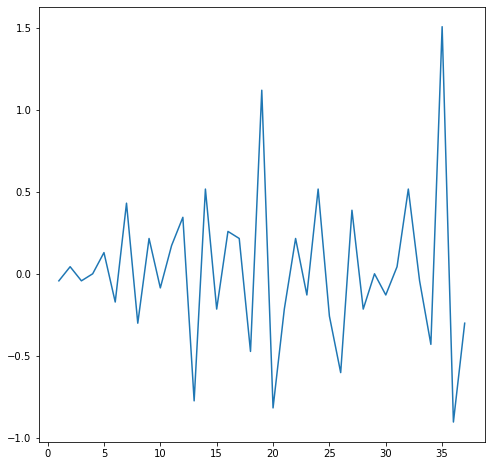

In [40]:
d = cases2
x1 = np.linspace(1, d.shape[1], d.shape[1])
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
plt.plot(x1, d[1860])
print(d.shape)
plt.show()

In [41]:
X_train = []
y_train = []
X_test = []
y_test = []
lag = 7
k = 7
validation_steps = 9
for j in range(deaths2.shape[0]):
    d = deaths2[j]
    c = cases2[j]
    if np.all(np.isnan(d)) or np.all(np.isnan(c)):
        continue
    s = np.argmax(np.isnan(d))
    for i in range(s):
        if np.any(np.isnan(d[i:i+lag+k])) or np.any(np.isnan(c[i:i+lag+k])):
            break
        x = np.vstack([c[i:i+lag], d[i:i+lag], np.full((lag,), i)]).T
        if i < s - validation_steps - lag - k:
            X_train.append(x)
            y_train.append(np.vstack([c[i+lag:i+lag+k], d[i+lag:i+lag+k]]).T)
        else:
            X_test.append(x)
            y_test.append(np.vstack([c[i+lag:i+lag+k], d[i+lag:i+lag+k]]).T)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [42]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(28229, 7, 3) (28229, 7, 2) (25312, 7, 3) (25312, 7, 2)


In [50]:
def LSTM_model():
    model = Sequential()
    model.add(LSTM(64, input_shape=X_train.shape[1:], activation='relu', return_sequences=True, recurrent_regularizer=L1L2(0,1e-2), kernel_regularizer=L1L2(0, 0.1)))
    model.add(TimeDistributed(Dense(2, kernel_regularizer=L1L2(0.1, 0.1))))
    return model

In [51]:
def pinball_loss(q, pred, true):
    e = pred - true
    return K.mean(K.maximum(q*e, (q-1)*e))

In [55]:
def get_model(q):
    model = LSTM_model()
    model.compile(loss=lambda pred, true: pinball_loss(q, pred, true), optimizer='adam')
    return model

def fit_model(model, X_train, y_train):
    model.fit(X_train, y_train, epochs=30, batch_size=72, verbose=2, shuffle=True)
    return model

def get_predictions(model):
    cases_predictions = {}
    deaths_predictions = {}
    count = 0
    for county in range(deaths2.shape[0]):
        count += 1
        if count % 50 == 0:
            print(count)
        d = deaths2[county]
        c = cases2[county]
        if np.all(np.isnan(d)) or np.all(np.isnan(c)):
            continue
        s = np.argmax(np.isnan(d))
        if s < lag:
            continue
        i = s - lag
        X = np.expand_dims(np.vstack([c[i:i+lag], d[i:i+lag], np.full((lag, ), i)]).T, axis=0)
        predictions1 = model.predict(X)
        X = np.expand_dims(np.hstack([predictions1[0], np.full((lag, 1), i)]), axis=0)
        predictions2 = model.predict(X)
        predictions = np.vstack([predictions1[0], predictions2[0]])
        cases_predictions[county] = predictions.T[0]
        deaths_predictions[county] = predictions.T[1]
    return cases_predictions, deaths_predictions

def get_total(cases_predictions, deaths_predictions):
    cp2 = {}
    dp2 = {}
    pop = np.expand_dims(demographics['total_pop'].values, axis=1)
    for county in cases_predictions:
        d = deaths2[county]
        c = cases2[county]
        s = np.argmax(np.isnan(d))
        d2 = np.concatenate([d[:(s)], deaths_predictions[county]])
        c2 = np.concatenate([c[:(s)], cases_predictions[county]])

        cp2[county] = untransform(c2, ct0[county], cx0[county], 0)
        dp2[county] = untransform(d2, dt0[county], dx0[county], 0)

        cp2[county] = cp2[county] * pop[county, 0] / 10000
        dp2[county] = dp2[county] * pop[county, 0] / 10000
    
    return cp2, dp2

In [56]:
forecast_deaths = {}
forecast_cases = {}

for q in [0.15, 0.2, 0.275, 0.35, 0.5, 0.55, 0.6, 0.675, 0.75]:
    model = get_model(q)
    model = fit_model(model, X_train, y_train)
    cases_predictions, deaths_predictions = get_predictions(model)
    cp2, dp2 = get_total(cases_predictions, deaths_predictions)
    
    forecast_deaths[q] = dp2
    forecast_cases[q] = cp2

Epoch 1/30
393/393 - 5s - loss: 0.8320
Epoch 2/30
393/393 - 5s - loss: 0.1042
Epoch 3/30
393/393 - 5s - loss: 0.1038
Epoch 4/30
393/393 - 5s - loss: 0.1039
Epoch 5/30
393/393 - 5s - loss: 0.1038
Epoch 6/30
393/393 - 5s - loss: 0.1040
Epoch 7/30
393/393 - 5s - loss: 0.1038
Epoch 8/30
393/393 - 5s - loss: 0.1040
Epoch 9/30
393/393 - 5s - loss: 0.1039
Epoch 10/30
393/393 - 5s - loss: 0.1040
Epoch 11/30
393/393 - 5s - loss: 0.1040
Epoch 12/30
393/393 - 5s - loss: 0.1041
Epoch 13/30
393/393 - 5s - loss: 0.1038
Epoch 14/30
393/393 - 5s - loss: 0.1043
Epoch 15/30
393/393 - 5s - loss: 0.1039
Epoch 16/30
393/393 - 5s - loss: 0.1039
Epoch 17/30
393/393 - 5s - loss: 0.1041
Epoch 18/30
393/393 - 5s - loss: 0.1039
Epoch 19/30
393/393 - 5s - loss: 0.1038
Epoch 20/30
393/393 - 5s - loss: 0.1039
Epoch 21/30
393/393 - 5s - loss: 0.1039
Epoch 22/30
393/393 - 5s - loss: 0.1040
Epoch 23/30
393/393 - 5s - loss: 0.1039
Epoch 24/30
393/393 - 5s - loss: 0.1048
Epoch 25/30
393/393 - 5s - loss: 0.1045
Epoch 26/

2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
Epoch 1/30
393/393 - 5s - loss: 0.8452
Epoch 2/30
393/393 - 5s - loss: 0.1238
Epoch 3/30
393/393 - 5s - loss: 0.1240
Epoch 4/30
393/393 - 5s - loss: 0.1237
Epoch 5/30
393/393 - 5s - loss: 0.1238
Epoch 6/30
393/393 - 5s - loss: 0.1240
Epoch 7/30
393/393 - 5s - loss: 0.1241
Epoch 8/30
393/393 - 5s - loss: 0.1238
Epoch 9/30
393/393 - 5s - loss: 0.1239
Epoch 10/30
393/393 - 5s - loss: 0.1238
Epoch 11/30
393/393 - 5s - loss: 0.1243
Epoch 12/30
393/393 - 5s - loss: 0.1240
Epoch 13/30
393/393 - 5s - loss: 0.1240
Epoch 14/30
393/393 - 5s - loss: 0.1239
Epoch 15/30
393/393 - 5s - loss: 0.1239
Epoch 16/30
393/393 - 5s - loss: 0.1240
Epoch 17/30
393/393 - 5s - loss: 0.1238
Epoch 18/30
393/393 - 5s - loss: 0.1252
Epoch 19/30
393/393 - 5s - loss: 0.1238
Epoch 20/30
393/393 - 5s - loss: 0.1238
Epoch 21/30
393/393 - 5s - loss: 0.1244
Epoch 22/30
393/393 - 5s - loss: 0.1240
Epoch 23/30
393/393 - 5s - loss: 0.1247
Epoch 24/30
393/393 - 5s - lo

In [62]:
from datetime import date, timedelta
start = date.today() - timedelta(days=2)
print(str(start))

2020-04-27


In [206]:
dd = u.load_covid_static()
dd[dd['FIPS'] == '02198']

,FIPS,County Name,cases,deaths,log_cases,log_deaths
87,02198,Prince of Wales-Hyder Census Area,2,0,0.30103,0.0


In [321]:
fips_data = u.load_covid_raw()[0]['FIPS']
fips_data[2696]

'48347'

In [322]:
fips_data[3142] = '66010'
fips_data

0       01001
1       01003
2       01005
3       01007
4       01009
        ...  
3138    56039
3139    56041
3140    56043
3141    56045
3142    66010
Name: FIPS, Length: 3143, dtype: object

In [97]:
import datetime as dt
print(dt.datetime.strptime('4/1/20', '%m/%d/%y'))

2020-04-01 00:00:00


In [113]:
start = dt.datetime.strptime('4/28/20', '%m/%d/%y').date()
curr = date.today() - timedelta(days=1)
print(str(start))

2020-04-28


In [420]:
strs_added = set()

In [421]:
predictions = []
for county in range(deaths2.shape[0]):
    if fips_data[county] in ['36061']:
        continue
    if county not in deaths_predictions:
        start = dt.datetime.strptime('4/1/20', '%m/%d/%y').date()
        end = dt.datetime.strptime('7/1/20', '%m/%d/%y').date()
        s = str(start) + '-' + fips_data[county].lstrip('0')
        
        if s in do_not_include:
            continue
        
        while start != end:
            predictions.append([str(start) + '-' + fips_data[county].lstrip('0')] + [0 for i in range(9)])
            strs_added.add(str(start) + '-' + fips_data[county].lstrip('0'))
            start = start + timedelta(days=1)
        continue
    quantiles = []
    for q in [0.15, 0.2, 0.275, 0.35, 0.5, 0.55, 0.6, 0.675, 0.75]:
        quantiles.append(np.diff(forecast_deaths[q][county][-15:]))
    quantiles = np.array(quantiles).T
    quantiles[quantiles < 0] = 0
    start = dt.datetime.strptime('4/1/20', '%m/%d/%y').date()
    curr = date.today() - timedelta(days=1)
    s = str(start) + '-' + fips_data[county].lstrip('0')  
    if s in do_not_include:
        continue
    while start != curr:
        predictions.append([str(start) + '-' + fips_data[county].lstrip('0')] + [0 for i in range(9)])
        strs_added.add(str(start) + '-' + fips_data[county].lstrip('0'))
        start = start + timedelta(days=1)
    for i in range(14):
        predictions.append([str(curr) + '-' + fips_data[county].lstrip('0')] + list(quantiles[i]))
        strs_added.add(str(curr) + '-' + fips_data[county].lstrip('0'))
        curr = curr + timedelta(days=1)
    start = curr
    end = dt.datetime.strptime('7/1/20', '%m/%d/%y').date()
    while start != end:
        predictions.append([str(start) + '-' + fips_data[county].lstrip('0')] + [0 for i in range(9)])
        strs_added.add(str(start) + '-' + fips_data[county].lstrip('0'))
        start = start + timedelta(days=1)
        
len(predictions)

285285

In [422]:
nytotal = np.zeros((9, 15))
for county in range(deaths2.shape[0]):
    if fips_data[county] not in ['36085', '36061', '36081', '36047', '36005']:
        continue
    quantiles = []
    for q in [0.15, 0.2, 0.275, 0.35, 0.5, 0.55, 0.6, 0.675, 0.75]:
        quantiles.append(forecast_deaths[q][county][-15:])
    quantiles = np.array(quantiles)
    nytotal += quantiles

nytotal = np.diff(nytotal).T
nytotal[nytotal < 0] = 0
start = dt.datetime.strptime('4/1/20', '%m/%d/%y').date()
curr = date.today() - timedelta(days=1)
while start != curr:
    predictions.append([str(start) + '-' + '36061'] + [0 for i in range(9)])
    strs_added.add(str(start) + '-' + '36061')
    start = start + timedelta(days=1)
for i in range(14):
    predictions.append([str(curr) + '-' + '36061'] + list(nytotal[i]))
    strs_added.add(str(curr) + '-' + '36061')
    curr = curr + timedelta(days=1)
start = curr
end = dt.datetime.strptime('7/1/20', '%m/%d/%y').date()
while start != end:
    predictions.append([str(start) + '-' + '36061'] + [0 for i in range(9)])
    strs_added.add(str(start) + '-' + '36061')
    start = start + timedelta(days=1)

In [423]:
for i in extras:
    predictions.append([str(i)] + [0 for i in range(9)])

In [384]:
u, c = np.unique(mine.index.values, return_counts=True)
dup = u[c > 1]
dup

array(['2020-04-01-36061', '2020-04-02-36061', '2020-04-03-36061',
       '2020-04-04-36061', '2020-04-05-36061', '2020-04-06-36061',
       '2020-04-07-36061', '2020-04-08-36061', '2020-04-09-36061',
       '2020-04-10-36061', '2020-04-11-36061', '2020-04-12-36061',
       '2020-04-13-36061', '2020-04-14-36061', '2020-04-15-36061',
       '2020-04-16-36061', '2020-04-17-36061', '2020-04-18-36061',
       '2020-04-19-36061', '2020-04-20-36061', '2020-04-21-36061',
       '2020-04-22-36061', '2020-04-23-36061', '2020-04-24-36061',
       '2020-04-25-36061', '2020-04-26-36061', '2020-04-27-36061',
       '2020-04-28-36061', '2020-04-29-36061', '2020-04-30-36061',
       '2020-05-01-36061', '2020-05-02-36061', '2020-05-03-36061',
       '2020-05-04-36061', '2020-05-05-36061', '2020-05-06-36061',
       '2020-05-07-36061', '2020-05-08-36061', '2020-05-09-36061',
       '2020-05-10-36061', '2020-05-11-36061', '2020-05-12-36061',
       '2020-05-13-36061', '2020-05-14-36061', '2020-05-15-360

In [424]:
len(predictions)

293293

In [402]:
import pandas as pd
mine = pd.read_csv('predictions.csv').set_index('id').sort_index()
sample = pd.read_csv('sample_submission.csv').set_index('id').sort_index()

In [403]:
mine.index.values.shape

(292929,)

In [404]:
sample.index.values.shape

(293293,)

In [405]:
a = set(sample.index.values)
b = set(mine.index.values)
print(len(a), len(b))

293293 292929


In [406]:
#extras = []
for i in a:
    if i not in b:
        pass
        print(i)
        #predictions.append([str(i)] + [0 for i in range(9)])
        #extras.append(i)
print(len(extras))

2020-05-05-36005
2020-04-24-36085
2020-06-01-36081
2020-04-20-36005
2020-06-11-36047
2020-04-20-36085
2020-06-19-36085
2020-06-10-36081
2020-06-06-36005
2020-06-16-36047
2020-06-17-36081
2020-06-25-36085
2020-06-18-36005
2020-06-15-36005
2020-04-06-36085
2020-04-14-36047
2020-06-06-36085
2020-04-28-36047
2020-06-02-36081
2020-04-05-36085
2020-06-22-36005
2020-04-25-36005
2020-05-10-36085
2020-04-11-36085
2020-06-06-36047
2020-06-12-36047
2020-04-02-36081
2020-06-18-36047
2020-05-20-36081
2020-06-09-36047
2020-04-01-36047
2020-06-19-36005
2020-04-22-36005
2020-05-24-36005
2020-04-24-36081
2020-05-17-36005
2020-05-09-36085
2020-06-21-36005
2020-06-30-36081
2020-04-19-36047
2020-06-17-36085
2020-04-26-36085
2020-05-01-36085
2020-05-04-36047
2020-04-08-36005
2020-05-30-36005
2020-04-19-36085
2020-06-01-36005
2020-05-21-36005
2020-06-26-36005
2020-06-05-36047
2020-06-29-36085
2020-06-12-36085
2020-05-06-36005
2020-06-25-36005
2020-04-07-36005
2020-05-05-36085
2020-05-11-36085
2020-05-17-360

In [399]:
#do_not_include = []
for i in b:
    if i not in a:
        pass
        #print(i)
        #do_not_include.append(i)
#do_not_include = set(do_not_include)
print(len(do_not_include))

637


In [400]:
len(do_not_include)

637

In [425]:
import csv
with open("predictions.csv", "w+", newline='') as f:
        csv_writer = csv.writer(f, delimiter = ",")
        csv_writer.writerows([['id', '10', '20', '30', '40', '50', '60', '70', '80', '90']])
        csv_writer.writerows(predictions)

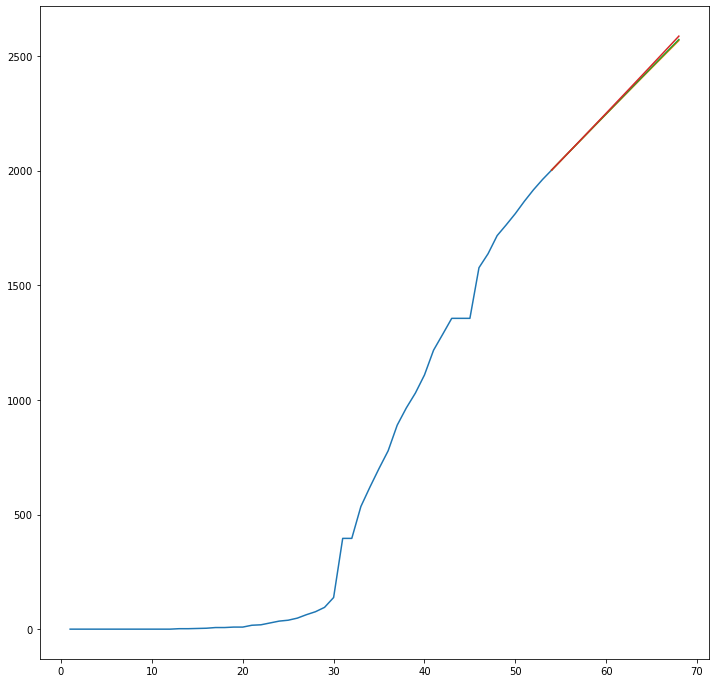

In [84]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)

county = 1857

d1 = deaths
x1 = np.linspace(1, d1.shape[1], d1.shape[1])
plt.plot(x1, d1[county])

s = np.argmax(np.isnan(d1[county])) - 1
d2 = forecast_deaths[0.15][county]
x2 = np.linspace(1, d2.shape[0], d2.shape[0])
plt.plot(x2[s:], d2[s:])

d2 = forecast_deaths[0.5][county]
x2 = np.linspace(1, d2.shape[0], d2.shape[0])
plt.plot(x2[s:], d2[s:])

d2 = forecast_deaths[0.75][county]
x2 = np.linspace(1, d2.shape[0], d2.shape[0])
plt.plot(x2[s:], d2[s:])

plt.show()